# Figure for scientific publication

Making figures for scientific reports with several subfigures can result in quite messy code. This is why I use functions defining individual subfigures and combine those in a grid.

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
plt.rc('text.latex', preamble = r"\usepackage{txfonts}")
plt.rc('text.latex', preamble = r"\usepackage{upgreek}")
plt.rc('text', usetex = True)
plt.rc('font', family='sans-serif')
plt.rc('font', size = 20)

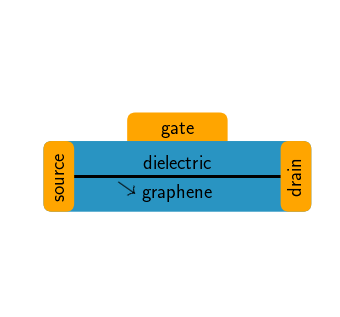

In [117]:
def range_brace(x_min, x_max, mid=0.75, 
                beta1=50.0, beta2=100.0, height=1, 
                initial_divisions=11, resolution_factor=1.5):
    # determine x0 adaptively values using second derivitive
    # could be replaced with less snazzy:
    #   x0 = np.arange(0, 0.5, .001)
    x0 = np.array(())
    tmpx = np.linspace(0, 0.5, initial_divisions)
    tmp = beta1**2 * (np.exp(beta1*tmpx)) * (1-np.exp(beta1*tmpx)) / .power((1+np.exp(beta1*tmpx)),3)
    tmp += beta2**2 * (np.exp(beta2*(tmpx-0.5))) * (1-np.exp(beta2*(tmpx-0.5))) / np.power((1+np.exp(beta2*(tmpx-0.5))),3)
    for i in range(0, len(tmpx)-1):
        t = int(np.ceil(resolution_factor*max(NP.abs(tmp[i:i+2]))/float(initial_divisions)))
        x0 = NP.append(x0, NP.linspace(tmpx[i],tmpx[i+1],t))
    x0 = NP.sort(NP.unique(x0)) # sort and remove dups
    # half brace using sum of two logistic functions
    y0 = mid*2*((1/(1.+NP.exp(-1*beta1*x0)))-0.5)
    y0 += (1-mid)*2*(1/(1.+NP.exp(-1*beta2*(x0-0.5))))
    # concat and scale x
    x = NP.concatenate((x0, 1-x0[::-1])) * float((x_max-x_min)) + x_min
    y = NP.concatenate((y0, y0[::-1])) * float(height)
    return (x,y)

def sub1(ax):
    import matplotlib.patches as mpatches
    plt.xlim([0,1])
    plt.ylim([0,1])
    x0 = 0.05
    y0 = 0.3
    width = 0.9
    height = 0.2
    cwidth=0.05
    gwidth = 0.3
    gheight = 0.075
    patches = []
    bncolor= (41/255,148/255,194/255)
    pad = 0.03
    bs = mpatches.BoxStyle("Round", pad=pad)
    dielectric = mpatches.FancyBboxPatch([x0,y0],width, height, boxstyle=bs,
                                         fc=bncolor,ec='none',zorder=3)
    plt.text(x0+0.5*width,y0+0.75*height,'dielectric',horizontalalignment='center',
            verticalalignment='center')
    patches.append(dielectric)
    
    plt.plot([x0,x0+width],[y0+height*0.5,y0+height*0.5],color='k',linewidth=3,zorder=4)
    plt.text(x0+0.23*width,y0+0.22*height,r'$\rightarrow$',size=24,rotation=-35)
    plt.text(x0+0.5*width,y0+0.2*height,'graphene',horizontalalignment='center',
            verticalalignment='center')
    source = mpatches.FancyBboxPatch([x0,y0],cwidth, height, boxstyle=bs,
                                     fc='orange',ec='none',zorder=5)
    plt.text(x0+0.5*cwidth,y0+0.5*height,'source',rotation=90,horizontalalignment='center',
            verticalalignment='center',zorder=6)
    patches.append(source)
    drain = mpatches.FancyBboxPatch([x0+width-cwidth,y0],cwidth, height, boxstyle = bs,
                                    fc='orange',ec='none',zorder=5)
    plt.text(x0+width-0.5*cwidth,y0+0.5*height,'drain',rotation=90,horizontalalignment='center',
            verticalalignment='center',zorder=6)
    patches.append(drain)
    
    gate = mpatches.FancyBboxPatch([x0+0.5*(width-gwidth),y0+height+pad],gwidth, gheight, boxstyle=bs,
                                   fc='orange',ec='none',zorder=2)
    plt.text(x0+0.5*width,y0+height+pad+0.6*gheight,'gate',horizontalalignment='center',
            verticalalignment='center')
    patches.append(gate)
    
   


    for p in patches:
        ax.add_patch(p)
    plt.axis('off')
#     plt.plot([0.1,0.9],[0.175,0.175],color='k',linewidth=2,zorder=5)
    
#     fs = 16
#     plt.text(0.5,0.65,'CH',fontsize=fs,zorder=8,horizontalalignment='center')
#     plt.text(0.2,0.36,'SG',fontsize=fs,zorder=8,horizontalalignment='center')
#     plt.text(0.8,0.36,'SG',fontsize=fs,zorder=8,horizontalalignment='center')
#     plt.text(0.2,0.55,r'Al$_\mathsf{2}$O$_\mathsf{3}$',zorder=8,horizontalalignment='center')
#     plt.text(0.24,0.08,r'$\uparrow$',fontsize=fs,color='w',zorder=8,horizontalalignment='center')
#     plt.text(0.5,0.075,r'graphene layer',fontsize=fs,color='w',zorder=8,horizontalalignment='center')
#     plt.text(0.5,-0.05,'BG',fontsize=fs,color='w',zorder=8,horizontalalignment='center')
#     plt.text(0.5,0.2,'boron nitride',fontsize=fs,color='w',zorder=8,horizontalalignment='center')



    
fig = plt.figure()
fig.set_size_inches(5,5)
ax = fig.add_subplot(111)
sub1(ax)

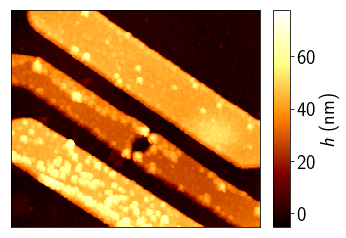

In [118]:
def sub2(ax):
    import AFM
    fileName = 'splitgates.006'
    channels, extent, extentUnit = AFM.createChannelDict(fileName)
    im = plt.pcolormesh(channels['Height Sensor'], cmap=plt.cm.afmhot)
    plt.xticks([])
    plt.yticks([])
    return(im)

def addCbar2(ax, im):
    cbar = fig.colorbar(im, cax = ax)
    ax.set_ylabel(r'\textit{h} (nm)')
    cticks = np.linspace(0, 60, 4)
    cbar.set_ticks(cticks)
    cbar.set_ticklabels(cticks.astype(int))

fig = plt.figure()
fig.set_size_inches(5,4)
gs = gridspec.GridSpec(1, 2, width_ratios=[15, 1],wspace=0.1)

ax1 = plt.subplot(gs[0])
im = sub2(ax1)
ax2 = plt.subplot(gs[1])
addCbar2(ax2, im)

# saveTo = os.path.join(folder,'stack21_qpc','export')
# plt.savefig(os.path.join(saveTo,'afm.png'),dpi=500,bbox_inches='tight')

In [23]:
#generate some random data
def gauss(x,y,x0,y0,sigma):
    return(np.exp(-((x-x0)**2+(y-y0)**2)/sigma**2))
   
x = np.linspace(0,1,101)
xx,yy = np.meshgrid(x,x)
zz = 5*(gauss(xx,yy,0.2,0.3,0.1)+gauss(xx,yy,0.5,0.7,0.3)+gauss(xx,yy,0.8,0.2,0.2))

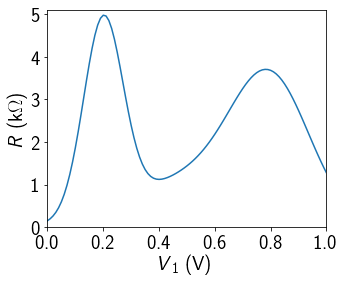

In [24]:
def sub3(ax):
    idx = 33
    plt.plot(xx[idx,:],zz[idx,:])
    plt.xlabel(r'\textit{V}$_\mathsf{1}$ (V)')
    plt.ylabel(r'\textit{R} (k$\Omega$)')
    plt.xlim([0, 1])
    plt.ylim([0, 5.1])
    xticks = np.linspace(0,1,6)
    plt.xticks(xticks,xticks)
    yticks = np.linspace(0,5,6)
    plt.yticks(yticks,yticks.astype(int))
    return(idx)

fig = plt.figure()    
fig.set_size_inches(5,4)
ax = fig.add_subplot(111)
idx = sub3(ax)

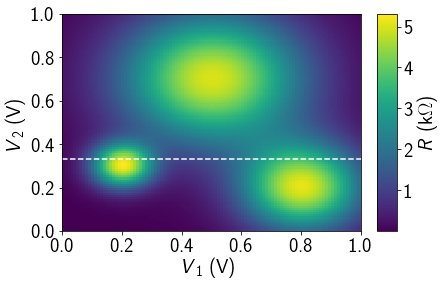

In [25]:
def sub4(ax,idx):
    im = plt.pcolormesh(xx,yy,zz)
    plt.xlabel(r'\textit{V}$_\mathsf{1}$ (V)')
    plt.ylabel(r'\textit{V}$_\mathsf{2}$ (V)')
    xticks = np.linspace(0,1,6)
    yticks = xticks
    plt.xticks(xticks,xticks)
    plt.yticks(yticks,yticks)
    plt.axhline(x[idx], color = 'w', linestyle = '--')
    return(im)

def addCbar4(ax, im):
    cbar = fig.colorbar(im, cax = ax)
    ax.set_ylabel(r'\textit{R} (k$\Omega$)')
    cticks = np.linspace(1, 5, 5)
    cbar.set_ticks(cticks)
    cbar.set_ticklabels(cticks.astype(int))
    
fig.set_size_inches(5,4)
gs = gridspec.GridSpec(1, 2, width_ratios=[15, 1],wspace=0.1)
ax1 = plt.subplot(gs[0])
im = sub4(ax1,idx)
ax2 = plt.subplot(gs[1])
addCbar4(ax2, im)

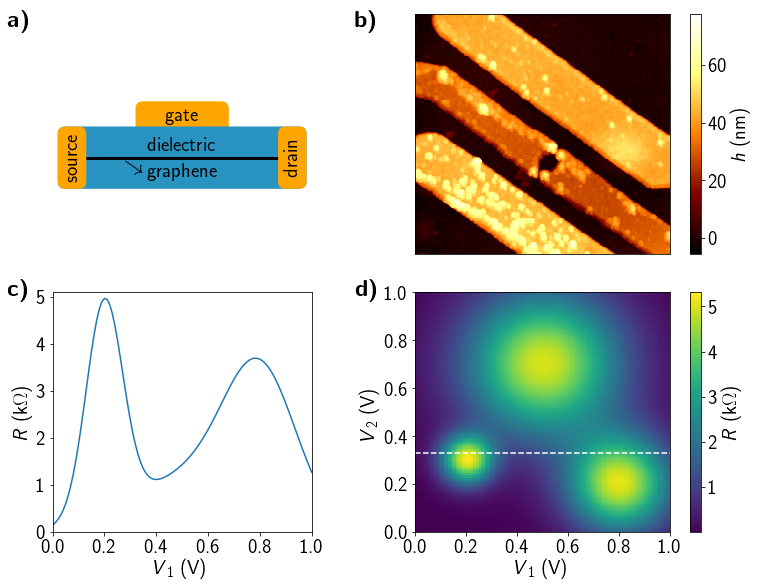

In [115]:
import matplotlib.gridspec as gridspec

fig = plt.figure()
fig.set_size_inches(12,9)



gs1 = gridspec.GridSpec(1, 1)

gs1.update(top=0.9,bottom=0.53,left=0.1,right=0.4)
ax1 = plt.subplot(gs1[:, :])
sub1(ax1)

gs2 = gridspec.GridSpec(1,10)
gs2.update(top=0.9,bottom=0.53,left = 0.52,right=0.85,wspace=2)
ax2a = plt.subplot(gs2[0, :9])
im = sub2(ax2a)
ax2b = plt.subplot(gs2[0, 9:])
addCbar2(ax2b,im)

gs3 = gridspec.GridSpec(1,8)
gs3.update(top=0.47,bottom=0.1,left=0.1,right=0.4,wspace=1)
ax3 = plt.subplot(gs3[:,:])
idx = sub3(ax3)

gs4 = gridspec.GridSpec(1,10)
gs4.update(top=0.47,bottom=0.1,left = 0.52,right=0.85,wspace=2)
ax4a = plt.subplot(gs4[0, :9])
im = sub4(ax4a,idx)
ax4b = plt.subplot(gs4[0, 9:])
addCbar4(ax4b,im)

ax = fig.add_subplot(111)
plt.text(-0.1,1,r'\textbf{a)}',size=24,transform=ax.transAxes,)
plt.text(0.42,1,r'\textbf{b)}',size=24,transform=ax.transAxes,)
plt.text(-0.1,0.45,r'\textbf{c)}',size=24,transform=ax.transAxes,)
plt.text(0.42,0.45,r'\textbf{d)}',size=24,transform=ax.transAxes,)
plt.axis('off');

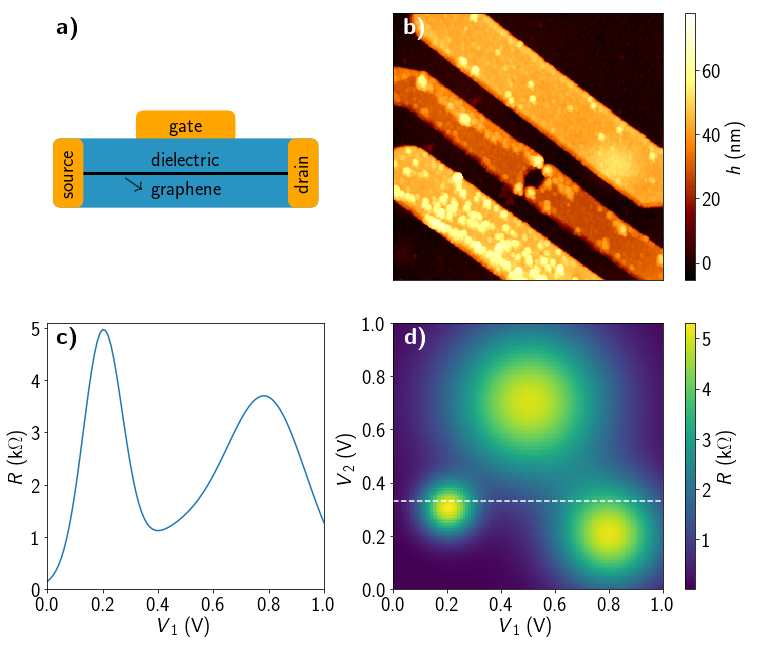

In [116]:
import matplotlib.gridspec as gridspec

fig = plt.figure()
fig.set_size_inches(12,10)



gs1 = gridspec.GridSpec(1, 1)

gs1.update(top=0.9,bottom=0.53,left=0.1,right=0.42)
ax1 = plt.subplot(gs1[:, :])
sub1(ax1)

gs2 = gridspec.GridSpec(1,10)
gs2.update(top=0.9,bottom=0.53,left = 0.5,right=0.85,wspace=2)
ax2a = plt.subplot(gs2[0, :9])
im = sub2(ax2a)
ax2b = plt.subplot(gs2[0, 9:])
addCbar2(ax2b,im)

gs3 = gridspec.GridSpec(1,8)
gs3.update(top=0.47,bottom=0.1,left=0.1,right=0.42,wspace=1)
ax3 = plt.subplot(gs3[:,:])
idx = sub3(ax3)

gs4 = gridspec.GridSpec(1,10)
gs4.update(top=0.47,bottom=0.1,left = 0.5,right=0.85,wspace=2)
ax4a = plt.subplot(gs4[0, :9])
im = sub4(ax4a,idx)
ax4b = plt.subplot(gs4[0, 9:])
addCbar4(ax4b,im)

ax = fig.add_subplot(111)
plt.text(-0.02,0.99,r'\textbf{a)}',size=24,transform=ax.transAxes,)
plt.text(0.5,0.99,r'\textbf{b)}',size=24,color= 'w',transform=ax.transAxes,)
plt.text(-0.02,0.42,r'\textbf{c)}',size=24,transform=ax.transAxes,)
plt.text(0.5,0.42,r'\textbf{d)}',size=24,color='w',transform=ax.transAxes,)
plt.axis('off');